# Users and Mentions word clouds - General Covid-19 dataset 

We've used the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import itertools
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
from matplotlib.colors import ListedColormap

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Users

We have filtered all the users:

In [3]:
index_users=0
cmt_list_users = []
for element in data:
    token_users=data[index_users]['user']['screen_name']
    cmt_list_users.append(token_users)
    index_users=index_users+1

We have calculated the frequency distribution, displayed in the form of a bar chart showing the 15 most frequent usernames within the dataset:

In [4]:
freq_dist = nltk.FreqDist(cmt_list_users)

#freq_dist.plot(15,cumulative=False)
#plt.show()

fdist_users = dict(freq_dist)
#fdist_sorted = dict(sorted(fdist_users.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
#out = dict(itertools.islice(fdist_sorted.items(), 15))

df_users = pd.DataFrame.from_dict(fdist_users, orient='index').reset_index()
df_users = df_users.rename(columns={'index':'Usernames', 0:'Count'})
#print(df_users)
#alt.renderers.enable('altair_viewer',inline=True)

#range=['#dae1fe','#d2dbfe','#c9d4fe','#c1cefe','#b9c7fe','#b1c0fe','#a9baff','#a1b3ff','#99adff','#90a6ff','#88a0ff','#8099ff','#7893ff','#708cff','#6886ff','#5f7fff','#5779ff','#4f72ff','#476cff','#3f65ff','#375fff','#2e58ff','#2652ff','#1e4bff','#1644ff','#0e3eff','#0637ff','#0032fc','#0030f4','#002fec','#002de4','#002cdc','#002ad4','#0028cc','#0027c3','#0025bb','#0023b3','#0022ab','#0020a3','#001f9b','#001d92','#001b8a','#001a82','#00187a','#001672''#00156a','#001361','#001159','#001051','#000e49','#000d41'

chart = alt.Chart(
    df_users
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Usernames:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(range=['#d4cef2','#b1a6e8','#8f7fdf','#6d58d5','#4b32ca','#3d28a3','#2e1f7c','#1f1554','#110b2d']))
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank < 15)
).properties(
    width=700,
    height=300,
    title = "Most 15 frequent usernames in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=15,
    titleFontSize=15,
    labelFontSize=13
)

chart

alt.Chart(...)

The users word cloud is created:

In [5]:
mask = np.array(Image.open('grafici/circle.jpg'))

a = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677','#AA3377', '#BBBBBB']
my_cmap = ListedColormap(a)

wordcloud = WordCloud(background_color ='white', 
                font_path = 'grafici/GothamMedium.ttf',
                mask=mask,
                width=mask.shape[1],
                height=mask.shape[0],
                min_word_length = 3,
                max_words=400,
                min_font_size = 10,
                colormap=my_cmap).generate_from_frequencies(fdist_users)

Plot the users word cloud:

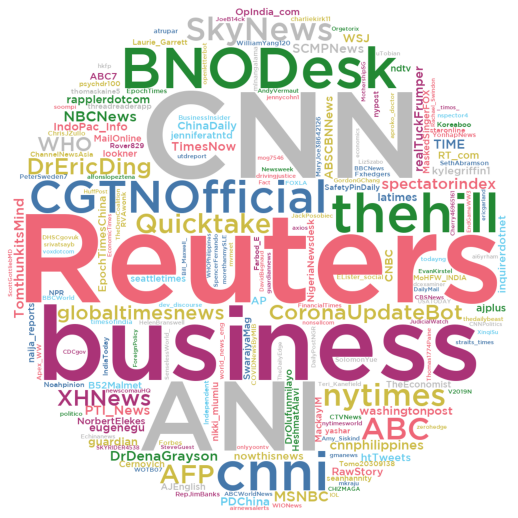

In [6]:
# Plot the word cloud image.                      
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

## Mentions

We have also filtered all the mentions:

In [7]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        cmt_list_mentions.append(token_mentions)
    index_mentions=index_mentions+1

We have calculated the frequency distribution, always displayed in the form of a bar chart showing the 15 most frequent mentioned usernames within the dataset:

In [8]:
fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
#fdist_sorted_mentions = dict(sorted(fdist_mentions.items(), key=lambda item: item[1], reverse=True))
#print(fdist_sorted)
#out_mentions = dict(itertools.islice(fdist_sorted_mentions.items(), 15))

df_mentions = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'Usernames', 0:'Count'})
#print(df)
#alt.renderers.enable('altair_viewer',inline=True)

#scale=alt.Scale(range=['#93f4a1','#8cf39b','#84f295','#7df18e','#75f188','#6ef081','#66ef7b','#5fee74','#58ee6e','#50ed68','#49ec61','#41ec5b','#3aeb54','#33ea4e','#2be947','#24e941','#1ce83b','#17e535','#16de34','#15d732','#14cf30','#14c82e','#13c02d','#12b92b','#11b129','#11aa27','#10a326','#0f9b24','#0e9422','#0e8c21','#0d851f','#0c7e1d','#0b761b','#0b6f1a','#0a6718','#096016','#085814','#085113']
c = alt.Chart(
    df_mentions
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Usernames:N',sort='-x'),
        color=alt.Color('Count:Q',scale=alt.Scale(range=['#c9f7d8','#9ef1ba','#73eb9b','#48e47c','#1fdd5e','#19b24c','#13873a','#0d5c27','#073115']))
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank < 15)
).properties(
    width=700,
    height=300,
    title="Most 15 frequent mentioned usernames in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=15,
    titleFontSize=15,
    labelFontSize=13
)

c

alt.Chart(...)

The mentions word cloud is created:

In [9]:
mask=np.array(Image.open('grafici/speech_bubble_8.jpg'))

a = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933','#DDCC77', '#CC6677','#882255','#AA4499']
my_cmap = ListedColormap(a)

wordcloud = WordCloud(mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],
            background_color ='white', 
            min_word_length = 3,
            max_words=300,
            font_path = 'grafici/GothamMedium.ttf',
            min_font_size = 10,
            colormap=my_cmap).generate_from_frequencies(fdist_mentions) 

Plot the mentions word cloud:

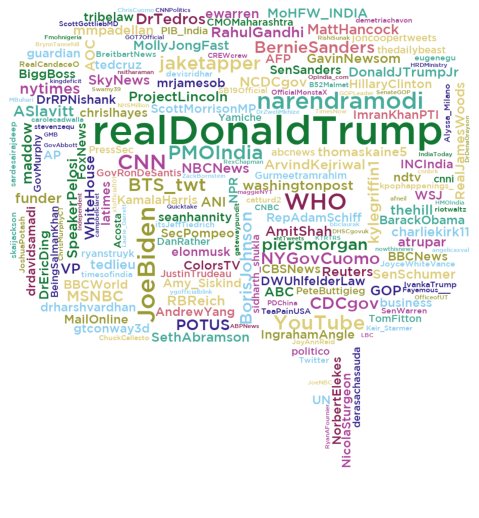

In [10]:
# Plot the word cloud image.                 
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()